In [1]:
#importing useful packages
import matplotlib.pyplot as plt
import numpy as np
from math import pi


In [4]:
!pip install qiskit

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 35.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 44.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.4/240.4 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.9/29.9 MB 44.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 41.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 42.4 MB/s eta 0:00:0000:0100:01
  Installing build dependenc

In [2]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.visualization import plot_state_qsphere
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer
from qiskit.quantum_info import Statevector

backend = BasicAer.get_backend('qasm_simulator')



ModuleNotFoundError: No module named 'qiskit'

1a

In [3]:
#initializing registers
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc=QuantumCircuit(q,c)

theta1=pi  #defining theta parameters for Rx gate
theta2=pi
theta3=0
qc.rx(theta1,0) #the Rx gate is being used to initialize the qubits
qc.rx(theta2,1)
qc.rx(theta3,2)


NameError: name 'QuantumRegister' is not defined

In the above block, acting Rx gate on each qubit with a parameter theta which can be controlled as an input allows for a hassle free initialization of the state before the Fredkin Gate is acted on the gate.

Action of the Fredkin gate twice on every possible initial state gives the same state as the output, thus proving that Fredkin gate is its own inverse

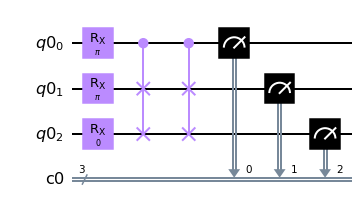

In [4]:

qc.fredkin(0,1,2)
qc.fredkin(0,1,2)
qc.measure(q,c)
qc.draw()


In [5]:
job = backend.run(transpile(qc, backend))
job.result().get_counts(qc)




{'011': 1024}

The above result shows us that the state remains unchanged

1b, verifying the identity C(X1)C=(X1)(X2)

Circuit for C(X1)C

In [6]:
#initializing registers
q1 = QuantumRegister(2)
c1 = ClassicalRegister(2)
qc1=QuantumCircuit(q1,c1)

theta1=pi  #defining theta parameters for Rx gate
theta2=pi

qc1.rx(theta1,0) #the Rx gate is being used to initialize the qubits
qc1.rx(theta2,1)



<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


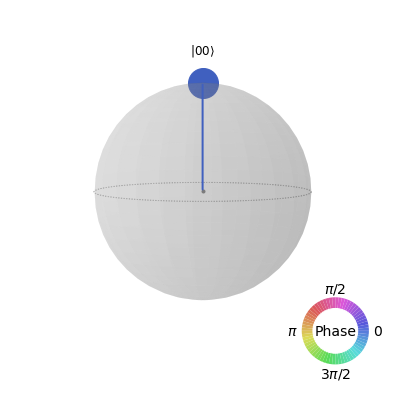

In [7]:


qc1.cx(0,1)
qc1.x(0)
qc1.cx(0,1)
plot_state_qsphere(qc1)







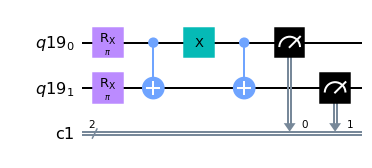

In [8]:
qc1.measure(q1,c1)
qc1.draw()

In [9]:
job = backend.run(transpile(qc1, backend))
job.result().get_counts(qc1)




{'00': 1024}

Circuit for (X1)(X2)

In [10]:
#initializing registers
q2 = QuantumRegister(2)
c2 = ClassicalRegister(2)
qc2=QuantumCircuit(q2,c2)

theta1=pi  #defining theta parameters for Rx gate
theta2=pi

qc2.rx(theta1,0) #the Rx gate is being used to initialize the qubits
qc2.rx(theta2,1)



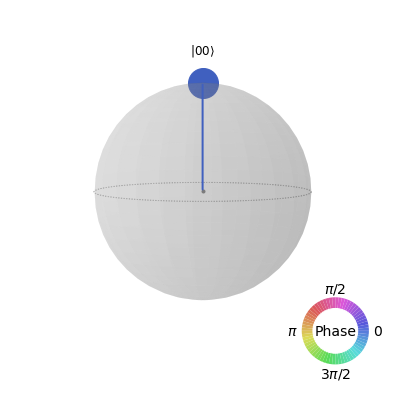

In [11]:
qc2.x(0)
qc2.x(1)
plot_state_qsphere(qc2)

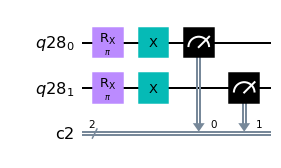

In [12]:
qc2.measure(q2,c2)
qc2.draw()

In [13]:
job = backend.run(transpile(qc2, backend))
job.result().get_counts(qc2)

{'00': 1024}

1b) C(Z1)C=Z1

In [14]:
#initializing registers
q3 = QuantumRegister(2)
c3 = ClassicalRegister(2)
qc3=QuantumCircuit(q3,c3)

theta1=pi  #defining theta parameters for Rx gate
theta2=0

qc3.rx(theta1,0) #the Rx gate is being used to initialize the qubits
qc3.rx(theta2,1)



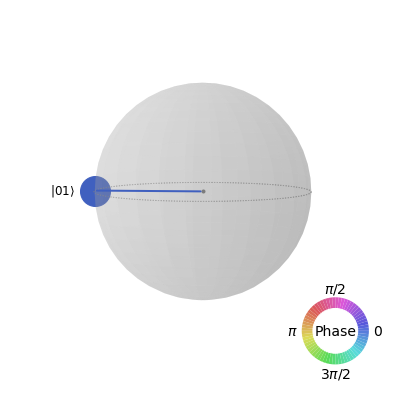

In [15]:
qc3.cx(0,1)
qc3.z(0)
qc3.cx(0,1)

plot_state_qsphere(qc3)

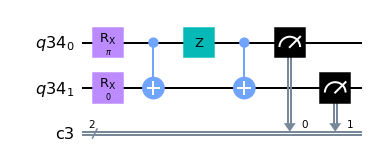

In [16]:
qc3.measure(q3,c3)
qc3.draw()

In [17]:
job = backend.run(transpile(qc3, backend))
job.result().get_counts(qc3)

{'01': 1024}

1b) Z1

In [18]:
#initializing registers
q4 = QuantumRegister(2)
c4 = ClassicalRegister(2)
qc4=QuantumCircuit(q4,c4)

theta1=pi  #defining theta parameters for Rx gate
theta2=0

qc4.rx(theta1,0) #the Rx gate is being used to initialize the qubits
qc4.rx(theta2,1)



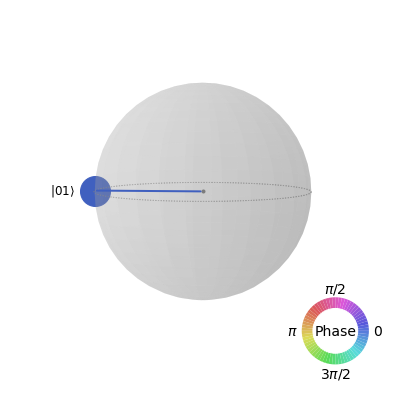

In [19]:

qc4.z(0)


plot_state_qsphere(qc4)

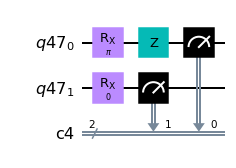

In [20]:
qc4.measure(q4,c4)
qc4.draw()

In [21]:
job = backend.run(transpile(qc4, backend))
job.result().get_counts(qc4)

{'01': 1024}

1B C(Y2)C

In [22]:
#initializing registers
q5 = QuantumRegister(2)
c5 = ClassicalRegister(2)
qc5=QuantumCircuit(q5,c5)

theta1=pi  #defining theta parameters for Rx gate
theta2=0

qc5.rx(theta1,0) #the Rx gate is being used to initialize the qubits
qc5.rx(theta2,1)



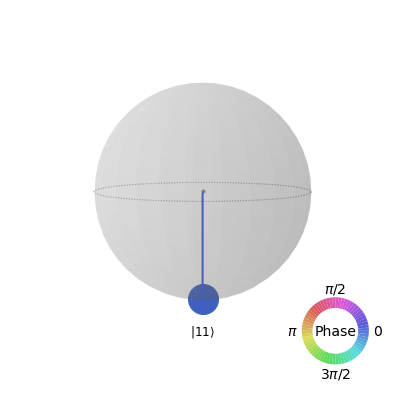

In [23]:
qc5.cx(0,1)
qc5.y(1)
qc5.cx(0,1)

plot_state_qsphere(qc5)

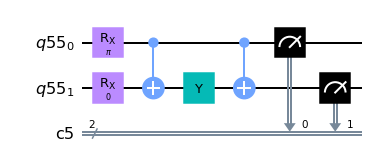

In [24]:
qc5.measure(q5,c5)
qc5.draw()

In [25]:
job = backend.run(transpile(qc5, backend))
job.result().get_counts(qc5)

{'11': 1024}

1B b)(Z1)(Y2)

In [26]:
#initializing registers
q6 = QuantumRegister(2)
c6 = ClassicalRegister(2)
qc6=QuantumCircuit(q6,c6)

theta1=pi  #defining theta parameters for Rx gate
theta2=0

qc6.rx(theta1,0) #the Rx gate is being used to initialize the qubits
qc6.rx(theta2,1)



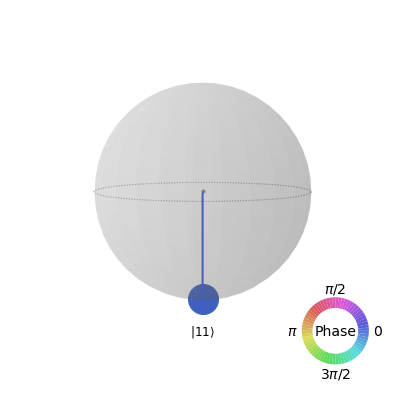

In [120]:
qc6.y(1)
qc6.z(0)


plot_state_qsphere(qc6)

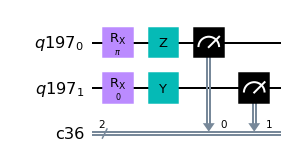

In [121]:
qc6.measure(q6,c6)
qc6.draw()

In [122]:
job = backend.run(transpile(qc6, backend))
job.result().get_counts(qc6)

{'11': 1024}

1B) d)-   C(Y1)C

In [166]:
#initializing registers
q7 = QuantumRegister(2)
c7 = ClassicalRegister(2)
qc7=QuantumCircuit(q7,c7)

theta1=pi  #defining theta parameters for Rx gate
theta2=0

qc7.rx(theta1,0) #the Rx gate is being used to initialize the qubits
qc7.rx(theta2,1)



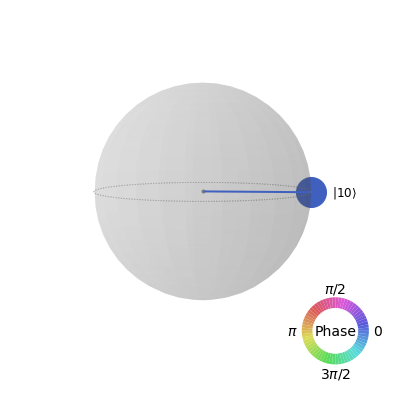

In [167]:
qc7.cx(0,1)
qc7.y(0)
qc7.cx(0,1)


plot_state_qsphere(qc7)

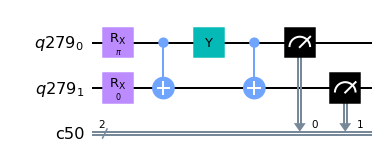

In [168]:
qc7.measure(q7,c7)
qc7.draw()

In [169]:
job = backend.run(transpile(qc7, backend))
job.result().get_counts(qc7)

{'10': 1024}

1B) d)-Y1(X2)

In [173]:
#initializing registers
q8 = QuantumRegister(2)
c8 = ClassicalRegister(2)
qc8=QuantumCircuit(q8,c8)

theta1=pi  #defining theta parameters for Rx gate
theta2=0

qc8.rx(theta1,0) #the Rx gate is being used to initialize the qubits
qc8.rx(theta2,1)



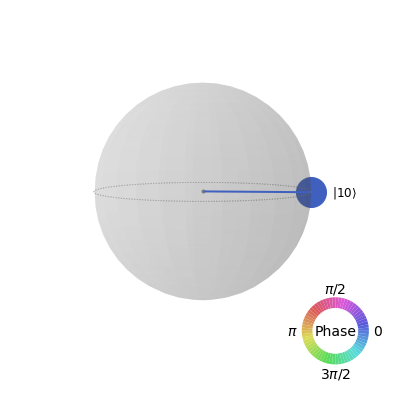

In [174]:
qc8.x(1)
qc8.y(0)
plot_state_qsphere(qc8)

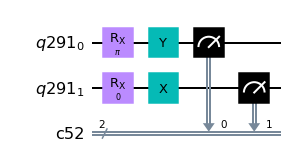

In [175]:
qc8.measure(q8,c8)
qc8.draw()

In [176]:
job = backend.run(transpile(qc8, backend))
job.result().get_counts(qc8)

{'10': 1024}

2

In [49]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute,IBMQ
from qiskit.tools.monitor import job_monitor

In [4]:
q = QuantumRegister(3,'q')
c = ClassicalRegister(3,'c')

circuit2 = QuantumCircuit(q,c)

circuit2.h(q[0]) # Hadamard gate 

circuit2.cx(q[0],q[1]) # CNOT gate
circuit2.cx(q[1],q[2])

ket = Statevector(circuit2)
ket.draw(output='latex')




    

<IPython.core.display.Latex object>

In [50]:
# Get backend for experiment
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_oslo')

# prepare the circuit for the backend
mapped_circuit2 = transpile(circuit2, backend=backend)
qobj2 = assemble(mapped_circuit2, backend=backend, shots=1024)

# execute the circuit
job2 = backend.run(qobj2)

Traceback (most recent call last):
  Input In [50] in <cell line: 3>
    backend = provider.get_backend('ibmq_oslo')
  File /opt/conda/lib/python3.8/site-packages/qiskit/providers/provider.py:55 in get_backend
    raise QiskitBackendNotFoundError("No backend matches the criteria")
QiskitBackendNotFoundError: 'No backend matches the criteria'

Use %tb to get the full traceback.


In [31]:
q = QuantumRegister(4,'q')
c = ClassicalRegister(4,'c')

circuit = QuantumCircuit(q,c)

circuit.h(q[0]) # Hadamard gate 

circuit.cx(q[0],q[1]) # CNOT gate
circuit.cx(q[1],q[2])
circuit.cx(q[2],q[3])

ket = Statevector(circuit)
ket.draw(output='latex')




    

<IPython.core.display.Latex object>

In [41]:
q = QuantumRegister(5,'q')
c = ClassicalRegister(5,'c')

circuit1 = QuantumCircuit(q,c)

circuit1.h(q[0]) # Hadamard gate 

circuit1.cx(q[0],q[1]) # CNOT gate
circuit1.cx(q[1],q[2])
circuit1.cx(q[2],q[3])
circuit1.cx(q[3],q[4])

ket = Statevector(circuit1)
ket.draw(output='latex')




    

<IPython.core.display.Latex object>

In [42]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, IBMQ, execute, transpile, Aer, assemble
from qiskit.tools.monitor import job_monitor

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [43]:
IBMQ.save_account("5a3b71cffe2a3bccf37174da38ff227eb7ed40ea30949a73971188235ceb452ef991ba465c9c0aa7cdddd32f9f07f3e18c239270a6a7cf4a1d61dfd9e72ee000", overwrite=True) 
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-09-06 17:34:54,600: Credentials are already in use. The existing account in the session will be replaced.


In [51]:
# Get backend for experiment
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_quito')

# prepare the circuit for the backend
mapped_circuit = transpile(circuit1, backend=backend)
qobj = assemble(mapped_circuit, backend=backend, shots=1024)

# execute the circuit
job = backend.run(qobj)

In [52]:
job.status()

<JobStatus.QUEUED: 'job is queued'>

3

In [2]:
q = QuantumRegister(3,'q')
c = ClassicalRegister(3,'c')

circuit2 = QuantumCircuit(q,c)

circuit2.h(q[0]) # Hadamard gate 

circuit2.cx(q[0],q[1]) # CNOT gate
circuit2.cx(q[1],q[2])

circuit2.x(0)

ket = Statevector(circuit2)
ket.draw(output='latex')




    

Traceback (most recent call last):
  Input In [2] in <cell line: 1>
    q = QuantumRegister(3,'q')
NameError: name 'QuantumRegister' is not defined

Use %tb to get the full traceback.


In [20]:
q = QuantumRegister(3,'q')
c = ClassicalRegister(3,'c')

circuit = QuantumCircuit(q,c)

circuit.h(q[0]) # Hadamard gate 

circuit.cx(q[0],q[1]) # CNOT gate
circuit.cx(q[1],q[2])

circuit.x(1)

ket = Statevector(circuit)
ket.draw(output='latex')




    

<IPython.core.display.Latex object>

In [23]:
q = QuantumRegister(3,'q')
c = ClassicalRegister(3,'c')

circuit = QuantumCircuit(q,c)

circuit.h(q[0]) # Hadamard gate 

circuit.cx(q[0],q[1]) # CNOT gate
circuit.cx(q[1],q[2])

circuit.x(2)

ket = Statevector(circuit)
ket.draw(output='latex')




    

<IPython.core.display.Latex object>

4